# Prandtl wing parameters

All the parameters for the analysis of the aircraft are presented here.

In [6]:
# Prandtl wing design and analysis notebook
# Aircraft parameters

# Geometric parameters
b = 15.0 # [m] wingspan
cr = 1.0 # [m] root chord
ct = 0.3 # [m] tip chord
LEsweep = 20 # [degrees] leading edge sweep

# Inertial parameters
m = 75 + 30 # [kg] Aircraft mass:  payload + structural mass
CG = 1*cr # [m] behind leading edge at centre line of the aircraft

# Aerodynamic parameters
CL = 0.6 # Design lift coefficient of 3D wing
CLstall = 1.2 # Stall lift coefficient of 3D wing
CL0 = 0.3 # [] Lift coefficient at zero angle of attack of the aircraft
CLa = 4.9 # [/rad] Lift coefficient slope
CM0 = 0.002 # CM0 is positive for a tailless aircraft and this is achieved through reflexed airfoils
CD0 = 0.00 # Minimum drag.  This is to be estimated for the aircraft in the drag budget below and must be verified with flight test.
peff = 0.8*0.8889 # Prandtl efficiency factor.  100% efficiency is 0.8889.  This needs to be estimated.

# Engine parameters
bat = 10 # [Ampere-hour] Battery energy
# propeller efficiency

# Derived parameters
# Geometric derived parameters
tr = ct/cr # [] taper ratio
s = b/2 # [m] semispan of wing
S = (s*(cr + ct)/2)*2 # [m^2] area of wing is double the trapezoid area of semispan

AR = b**2/S

# Atmospheric conditions
rho = 1 # [kg/m^3] Density of air

# Performance parameters
V = ((m*9.81)/(0.5*rho*S*CL))**0.5 # [m/s] Design cruise speed
print('Design trim speed is ' + '{:.1f}'.format(V*3.6) + 'km/h')
Vstall = ((m*9.81)/(0.5*rho*S*CLstall))**0.5 # [m/s] Design cruise speed
print('Design stall speed is ' + '{:.1f}'.format(Vstall*3.6) + 'km/h')

Design trim speed is 67.6km/h
Design stall speed is 47.8km/h


In [4]:
# All modules imported
from math import pi
import matplotlib.pyplot as plt
import sympy

# Drag budget of the aircraft

The drag is estimated using analytical methods.

In [5]:
CD0 = CD0 + 0.02 # Conservative estimate for drag

# Spanwise lift distribution

The spanwise lift distribution is plotted here and integrated to check that it gets the answer of the design lift coefficient.

Text(0.5,0,'Semispan position [m]')

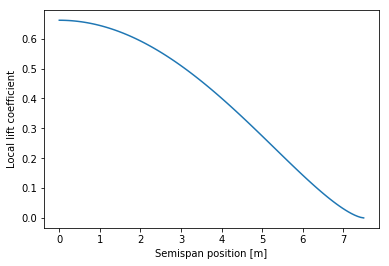

In [3]:
# Plot spanwise lift distribution

points = 100
yp = range(0, points + 1)
y = [(i*b/2)/points for i in yp]
g = [(32/(3*pi*AR))*CL*(1 - yi**2/(s**2))*((s**2 - yi**2)**0.5) for yi in y]
plt.plot(y, g)
plt.ylabel('Local lift coefficient')
plt.xlabel('Semispan position [m]')

The integral of the above Prandtl lift distribution must yield back the design lift coefficient.

Use symbolic python to integrate the equation.

The lift coefficient of the whole wing integrated is:

$$C_L = 2 \times \frac{\int_0^s \gamma_s(y) dy}{S}$$ 

where $\gamma_s$ is the lift coefficient for the 2D wing section

In [4]:
ysym = sympy.symbols('ysym')

prandtl = (32/(3*pi*AR))*CL*(1 - ysym**2/(s**2))*((s**2 - ysym**2)**0.5)

print('Check the lift coefficient is the same for the whole wing when integrated:')
print(sympy.integrate((2/S)*prandtl, (ysym, 0, s)))
print('It gives the same as the design lift coefficient so equations were entered correctly.')

Check the lift coefficient is the same for the whole wing when integrated:
0.600000000000000
It gives the same as the design lift coefficient so equations were entered correctly.


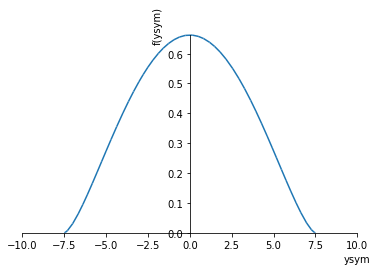

In [5]:
# Use sympy to plot the lift distribution spanwise as a check:
# It gives the same answer so that is OK.
t = sympy.symbols('t')
x = 0.05*t + 0.2/((t - 5)**2 + 2)
sympy.plotting.plot(prandtl)

# Bending moment at root

The lift coefficient for half the wing span is:

$$C_L = \frac{\int_0^s \gamma_s(y) dy}{S}$$ 

therefore the lift force for half the wing is:

$$L_{0.5} = \frac{1}{2} \rho V^2 S \frac{\int_0^s \gamma_s(y) dy}{S}$$ 
$$L_{0.5} = \frac{1}{2} \rho V^2 \int_0^s \gamma_s(y) dy$$ 

Now the bending moment at the root of the wing can be calculated as:

$$BM = \frac{1}{2} \rho V^2 \int_0^s \gamma_s(y) y dy$$ 

In [6]:
# Calculate the wing root bending moment by evaluating the above integral:
BM = sympy.integrate((1/2)*rho*(V**2)*prandtl*ysym, (ysym, 0, s))

In [7]:
# Print the bending moment result:
print('The root bending moment is ' + '{:.1f}'.format(BM) + 'N.m')
print('The equivalent moment arm is ' + '{:.1f}'.format(BM/((m/2)*9.81)) + 'm')
print('or ' + '{:.1f}'.format(100*(BM/((m/2)*9.81))/s) + '% semispan')

The root bending moment is 1311.5N.m
The equivalent moment arm is 2.5m
or 34.0% semispan


# Neutral point calculation

The neutral point is the point where the moment is independant of angle of attack.  

- It is assumed that all sections of the airfoils have a zero moment coefficient in order to simplify the calculation.  
- The centre of pressure of each airfoil is assumed to be at 25% chord.

Also plot the $C_M$ versus $\alpha$ curve in the linear region.

It should be checked with CFD whether the wing has positive moment with high $\alpha$.  This is typical of tailless aircraft and leads to nose-up stall behaviour which is highly undesirable.  It needs to be investigated whether this can be changed with aerodynamics if possible if the aircraft does turn out to behave like that.

First plot the quarter chord as a distance from the leading edge at the centre line.
Take the leading edge at the centre line of the aircraft as the moment reference point.  Take moments about this point.

The lift of the Prandtl distribution is:

$$L = \frac{1}{2} \rho V^2 S \frac{\int_{-s}^s \gamma_s(y) dy}{S}$$ 

Therefore moments about this point is:

$$M_{centre LE} = \frac{1}{2} \rho V^2 S \frac{\int_{-s}^s \gamma_s(y) c_{0.25}(y) dy}{S}$$ 

The neutral point can now be calculated as the moment divided by the lift to get the moment arm:

$$NP = \frac{M_{centre LE}}{L} $$

or with the necessary substitutions:

$$NP = \frac{\int_{-s}^s \gamma_s(y) c_{0.25}(y) dy}{\int_{-s}^s \gamma_s(y) dy} $$



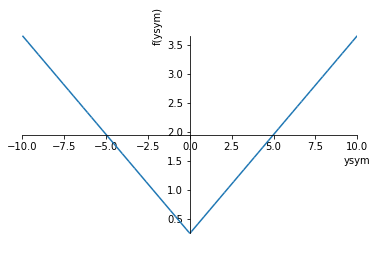

In [8]:
# Use sympy to plot the lift distribution spanwise as a check:
# It gives the same answer so that is OK.
t = sympy.symbols('t')
x = 0.05*t + 0.2/((t - 5)**2 + 2)
#sympy.plotting.plot(sympy.abs(ysym)*sympy.tan(LEsweep*pi/180) + 0.25*chord)
chord = (ct - cr)/s * sympy.functions.Abs(ysym) + cr
LEmomArm = sympy.functions.Abs(ysym)*sympy.tan(LEsweep*pi/180) + 0.25*chord
sympy.plotting.plot(LEmomArm)

In [9]:
# Integrate the equations in order to calculate the neutral point
forceNP = sympy.integrate(prandtl, (ysym, -s, s))
momentNP = sympy.integrate(prandtl*LEmomArm, (ysym, -s, s))

In [10]:
NP = momentNP/forceNP
print('The neutral point is ' + '{:.3f}'.format(NP) + 'm aft of the leading edge at centre span.')
print('This is ' + '{:.1f}'.format(100*NP/cr) + '% of root chord')

The neutral point is 1.117m aft of the leading edge at centre span.
This is 111.7% of root chord


# Performance calculations


## Glider performance calculations

The sink speed curve is plotted here.  This determines the performance of the aircraft.  The minimum L/D is calculated here for maximum glide slope and the minimum sink rate for maximum loiter time.


<img src="files/pictures/AircraftFBD.png">

In order to calculate the sink plot polar, choose a true airspeed to analyze for and perform all the following calculations.  Then repeat for a selection of true airspeed values and plot the polar.

The aerodynamic moment is calculated as:

$$M = \frac{1}{2}\rho V^2 S C_{M_\alpha} \cdot \alpha$$

x is the static margin in metres.  Now taking moments about the neutral point of the aircraft, for the aircraft to be in trim, the moments must sum to zero.

$$ \sum M_{ac} = 0$$

$$ M_{ac} + mgx = 0$$

Now substituting:

$$ \frac{1}{2}\rho V^2 S C_{M_\alpha} \cdot \alpha + mgx = 0$$


<img src="files/pictures/CMalphaAircraft.png">

and rearranging, we can obtain the trim angle of attack $\alpha$:

$$\alpha = \frac{-mgx}{\frac{1}{2}\rho V^2 S C_{M_\alpha}}$$

Now calculate the aerodynamic lift and drag coefficients:

$$C_L = C_{L \alpha} \cdot \alpha + C_{L0}$$

$$C_D = C_{D0} + \frac{C_L^2}{\pi A p}$$

where A is the Aspect Ratio of the aircraft and p is the Prandtl efficiency factor 0.8889 according to NASA/TP—2016–219072.

Now the lift to drag ratio can be calculated as:

$$\frac{L}{D} = \frac{C_L}{C_D}$$

The lift to drag ratio can be used to calculate the sink speed and the ground speed because of the following relationship:

$$\frac{L}{D} = \frac{Distance}{Height} = \frac{V_H \cdot t}{V_S \cdot t} = \frac{V_H}{V_S}$$

meaning the lift to drag ratio is equal to the ratio of the ground distance travelled to the change in height to the ground.  Where t is time travelled.

therefore the lift to drag ratio is equal to the ratio of ground speed $V_H$ to sink speed $V_S$

$$\frac{L}{D} = \frac{V_H}{V_S}$$

Now 

$$V_H = V_S \cdot \frac{L}{D}$$

$$V_H = V_S \cdot \frac{C_L}{C_D}$$

True airspeed V is:

$$V = \sqrt{V_H^2 + V_S^2}$$

Substituting for $V_H$, we can calculate sink speed from the chosen true airspeed.

$$V = \sqrt{\bigg(V_S \cdot \frac{C_L}{C_D}\bigg)^2 + V_S^2}$$

$$V^2 = \bigg(1 + \frac{C_L}{C_D}\bigg)V_S^2$$

$$V_S = \sqrt{\frac{V^2}{\bigg(1 + \frac{C_L}{C_D}\bigg)}}$$

and now V_H can be calculated with a previous equation.

## Powered flight range and loiter time

Calculate the range and loiter time using battery powered flight.

18.765762605176644


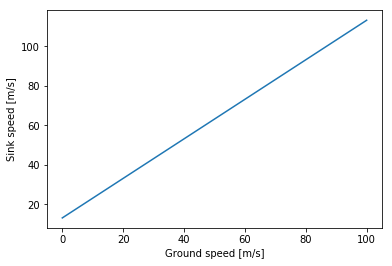

In [19]:
# Now calculate the moment curve of the aircraft
# CM0 is positive for a tailless aircraft and this is achieved through reflexed airfoils

points = 100
Vtrue = range(0, points + 1)
Vtrue = [0.7*V+speed for speed in Vtrue]
plt.plot(Vtrue)
plt.ylabel('Sink speed [m/s]')
plt.xlabel('Ground speed [m/s]')

print(V)

# Aeroelastic calculations

Create a mass-spring system for the wing structure with aerodynamic loading in order to obtain a bode plot for the aircraft structure under aeroelastic loading.  It must include bending as well as a torsional mode.  The frequencies of these structural modes must be outside typical gust load and pilot induced or 2-3Hz vibrational frequencies.